In [1]:
%matplotlib notebook

Calcuate and display a a preference index.

ON = Time spent in a square where light is turned on

OFF = Time spent on a square where light is turned off

$$PI= \frac{ON-OFF}{ON+OFF}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import os
from pathlib import Path
import statsmodels.api as sm

In [3]:
home_path = os.getcwd()
data_path = Path(home_path, 'data/Gr66a-Gal4xUAS-Chrimson/')
data_path_ctr = Path(home_path, 'data/empty-Gal4xUAS-Chrimson/')
# all the figures will be saved in this folder
target_path = Path(home_path, 'plots/')
Path(target_path).mkdir(parents=True, exist_ok=True) 

In [4]:
# Collect all the data for the experimental condition
# find all folders in the data_path
folders = [x for x in data_path.iterdir() if x.is_dir()]
preference_index_gr66a = []
for i, folder_name in enumerate(folders):
    print('Analyzing ' + folder_name.parts[-1])
    
    files = [x for x in folder_name.iterdir() if x.is_file()]
    # find the data_file.csv to get the distance to source of the centroid
    for file in files:
        if 'data.csv' in file.parts[-1]:
            data = pd.read_csv(file)
    
    if i == 0:
        stimulation = np.zeros((data.shape[0], len(folders)))
        
    stimulation[:,i] = data['stimulation']
    
    # calculate the preference index: time spent in light = light on, time spent away from light = light off
    # 40000 is light off (as we are in the inverted world of the high-powered LEDs) and ~36000 is 10% of the max light 
    # intensity
    light_on = np.where(stimulation[:,i] < 40000)[0].shape[0]
    light_off = np.where(stimulation[:,i] == 40000)[0].shape[0]
    
    preference_index_gr66a.append((light_on-light_off)/(light_on+light_off))

Analyzing 04.10.2018_16-24-49_Gr66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_16-37-40_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_16-49-15_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_16-55-45_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_17-01-14_GR66a-Gal4xUAS-Chrimson

C:\Users\David Tadres\.conda\envs\pivr_publication\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less



Analyzing 04.10.2018_17-06-46_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_17-17-45_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_17-27-23_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_17-37-11_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_17-45-34_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_17-51-10_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_13-12-31_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_13-29-42_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_13-38-38_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_13-57-46_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-04-53_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-10-45_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-16-15_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-25-58_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-31-17_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-38-09_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-43-53_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-49-42_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-55-

In [5]:
# Collect the empty-Gal4 (control) data
folders = [x for x in data_path_ctr.iterdir() if x.is_dir()]

preference_index_empty_10 = []
for i, folder_name in enumerate(folders):
    print('Analyzing ' + folder_name.parts[-1])
    
    files = [x for x in folder_name.iterdir() if x.is_file()]
    # find the data_file.csv to get the distance to source of the centroid
    for file in files:
        if 'data.csv' in  file.parts[-1]:
            data = pd.read_csv(file)
    
    if i == 0:
        stimulation = np.zeros((data.shape[0], len(folders)))
        
    stimulation[:,i] = data['stimulation']
    
    # calculate the preference index: time spent in light = light on, time spent away from light = light off
    # 40000 is light off (as we are in the inverted world of the high-powered LEDs) and ~36000 is 10% of the max light 
    # intensity
    light_on = np.where(stimulation[:,i] < 40000)[0].shape[0]
    light_off = np.where(stimulation[:,i] == 40000)[0].shape[0]
    
    preference_index_empty_10.append((light_on-light_off)/(light_on+light_off))

Analyzing 04.10.2018_14-20-29_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_14-30-14_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_14-50-03_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_14-55-36_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_15-03-24_empty-Gal4xUAS-Chrimson

C:\Users\David Tadres\.conda\envs\pivr_publication\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less



Analyzing 04.10.2018_15-10-31_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_15-17-57_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_15-30-41_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_15-36-18_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_15-54-05_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_15-52-29_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_15-58-02_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-03-29_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-08-58_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-26-47_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-32-26_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-37-58_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-43-20_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-48-47_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-54-11_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-59-27_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_15-35-22_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_15-40-54_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_15-46-

In [6]:
# STATISTICS:
# Test for normality (not significantly different), then use T-Test to compare the preference index of the
# two genotypes
print('n gr66a: ' + repr(len(preference_index_gr66a)) + ' n empty: '+ repr(len(preference_index_empty_10)))
print("lilliefors Gr66a: " + repr(sm.stats.lilliefors(preference_index_gr66a)[1]), 
     "lilliefors empty: " + repr(sm.stats.lilliefors(preference_index_empty_10)[1])) 
#The Levene test tests the null hypothesis that all input samples are from populations with equal variances. 
print(stats.levene(preference_index_gr66a, preference_index_empty_10))
# As the lilliefors test shows that the Gr66a data is not normally distributed we have to use the Ranksum test
print(stats.ranksums(preference_index_gr66a, preference_index_empty_10))

n gr66a: 28 n empty: 24
lilliefors Gr66a: 0.03852349006607928 lilliefors empty: 0.02422848854925388
LeveneResult(statistic=1.7145731818163046, pvalue=0.19637845839767598)
RanksumsResult(statistic=-4.662316673661137, pvalue=3.1266957533940933e-06)


<IPython.core.display.Javascript object>


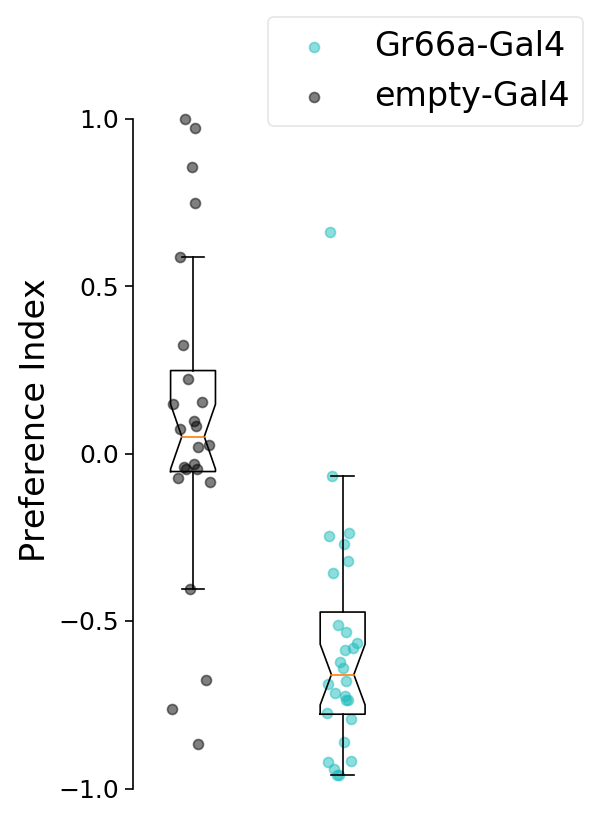

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [10]:
# PLOTTING
x_gr66a = np.random.normal(0.5, 0.03, size=len(preference_index_gr66a))
x_empty = np.random.normal(0, 0.03, size=len(preference_index_empty_10))

fig = plt.figure(figsize=(5,7))
ax=fig.add_subplot(111)
ax.set_rasterization_zorder(1)
# Plot the experimental data
ax.scatter(x=x_gr66a, y=preference_index_gr66a, alpha=0.5, color='#1ebcbd', label='Gr66a-Gal4',zorder=0)
ax.boxplot(preference_index_gr66a, positions=[0.5], showfliers=False, notch=True,zorder=1)
# Plot the control data
ax.scatter(x=x_empty, y=preference_index_empty_10, alpha =0.5, color='k', label='empty-Gal4',zorder=0)
ax.boxplot(preference_index_empty_10, positions=[0], showfliers=False, notch=True,zorder=1)
# Necessary to show whats been plotted
ax.set_xlim(-0.2,1.3)
ax.set_ylim(-1.1,1.3)

ax.set_xticks(ticks=[-0,0.5])

ax.set_yticks(ticks=[-1,-0.5,0,0.5,1])
ax.tick_params(axis='y', labelsize=15)
ax.set_ylabel('Preference Index', fontsize=20)

ax.set_xticklabels([])

# get rid of ticks (bottom ticks)
ax.tick_params(
        #axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the left edge are off
        labelleft=True,   # labels along the left edge are off
        labelbottom=True
        ) 

# turn spines of everywhere except on the left
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# modify spines on the left
ax.spines['left'].set_bounds(-1,1)

fig.legend(fontsize=20, framealpha=0.5)

# TOP PLOT SPINES
# Only draw spine between the y-ticks
ax.spines['left'].set_bounds(-1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_linewidth(1)
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', width=1, length =5)
#ax.tick_params(axis='both', which='minor', width =2,length =3)

fig.tight_layout()
fig.savefig(Path(str(target_path) + '/Fig3c.eps'))#, rasterized=True, dpi=300)